In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as skm
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
data = df.values

#df_5_6 = df.loc[df['quality'].isin([5, 6])]
#y = df_5_6.quality
#X = df_5_6.drop(['quality'],axis=1)

y = df.quality
y -= 3
X = df.drop(['fixed acidity', 'quality'],axis=1)

# Apply PCA
#pca = PCA(n_components=9)
#X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = skm.train_test_split(X_train,y_train,test_size = 0.2, stratify=y_train, random_state=42)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)
#X_test = scaler.transform(X_test)

In [144]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
k = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
best_acc = 0.0
best_k = 1
best_metric = 'cityblock'
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']
for metric in metrics:
    for j in k:
        knn = KNeighborsRegressor(n_neighbors=j, metric=metric, weights='distance', algorithm='brute')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        y_pred = np.around(y_pred)
        accuracy_val = accuracy_score(y_val, y_pred)
        if accuracy_val > best_acc:
            best_acc = accuracy_val
            best_k = j
            best_metric = metric
print(f'val acc = {best_acc*100}%')
print(f'k = {best_k}')
print(f'metric = {best_metric}')

val acc = 68.359375%
k = 16
metric = cosine


In [145]:
knn = KNeighborsRegressor(n_neighbors=best_k, metric=best_metric, weights='distance', algorithm='brute')
knn.fit(X_train, y_train)
#y_pred_train_raw1 = knn.predict(X_train)
y_pred_val_raw1 = knn.predict(X_val)
#y_pred_test_raw1 = knn.predict(X_train)
#for i in range(len(y_pred_test_raw1)):
    #y_pred_test_raw1[i] = 3
    #if y_pred_test_raw1[i]>6.501:
        #y_pred_test_raw1[i] = y_pred_test_raw1[i] + 0.4
    #else :
        #y_pred_test_raw1[i] = y_pred_test_raw1[i] + 0.06
y_pred_val = np.around(y_pred_val_raw1)
#accuracy_test = accuracy_score(y_test, y_pred)
#print(f'mod test acc = {accuracy_test*100}%')

In [146]:
#counts, bins = np.histogram(y_pred_val)
#plt.stairs(counts, bins)
#plt.title('histogram of outputs')

In [147]:
#misclassed_label = []
#misclassed_output = []
#y_test = y_test.to_numpy()
#for i in range(len(y_test)):
    #if y_pred_test[i] != y_test[i]:
        #misclassed_label.append(y_test[i])
        #misclassed_output.append(y_pred_test_raw1[i])
#misclassed_label = np.array(misclassed_label)
#misclassed_output = np.array(misclassed_output)

In [148]:
#counts, bins = np.histogram(misclassed_label)
#plt.stairs(counts, bins)
#plt.title('histogram of quality misclassified instances in test set')
#plt.show()

In [149]:
# linear regression y_test, y_pred_test_raw1
#from sklearn import linear_model
#reg = linear_model.LinearRegression()
#reg.fit(y_test.reshape(-1, 1), y_pred_test)
#line = reg.predict(np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1))

In [150]:
#plt.scatter(y_test, y_pred_test_raw1)
#plt.scatter(misclassed_label, misclassed_output, color='red', s=4, label='misclassified')
#plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], color='purple', label = 'truth')
#plt.plot([0, 1, 2, 3, 4, 5], line, color = 'orange', label = 'linear regression')
#plt.grid()
#plt.title('misclassified instances in test set')
#plt.ylabel('predicted output')
#plt.xlabel('quality')
#plt.legend()
#plt.show()

In [151]:
mlp = MLPRegressor(hidden_layer_sizes=((160,)*4)\
                            ,max_iter=10000,\
                            random_state=30, activation='relu',alpha=1)

# Fitting the MLP on the training data set
mlp.fit(X_train, y_train)

# Making predictions on the test and training set
#y_pred_train_raw2 = mlp.predict(X_train)
y_pred_val_raw2 = mlp.predict(X_val)
#y_pred_test_raw2 = mlp.predict(X_train)
y_pred_val = np.around(y_pred_val_raw2)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(accuracy_val)

0.5546875


In [152]:
rfr = RandomForestRegressor(random_state=30)
rfr.fit(X_train, y_train)
y_pred_val_raw3 = rfr.predict(X_val)
#y_pred_test_raw3 = rfr.predict(X_train)
y_pred_val = np.around(y_pred_val_raw3)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(accuracy_val)

0.66796875


In [153]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_val_raw4 = svr.predict(X_val)
#y_pred_test_raw3 = rfr.predict(X_train)
y_pred_val = np.around(y_pred_val_raw4)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(accuracy_val)

0.62109375


In [154]:
#new = np.stack((y_pred_val_raw1, y_pred_val_raw2, y_pred_val_raw3), axis=1)
#scaler = preprocessing.StandardScaler().fit(new)
#pca = scaler.transform(new)
#pca = PCA(n_components=2)
#visual = pca.fit_transform(new)

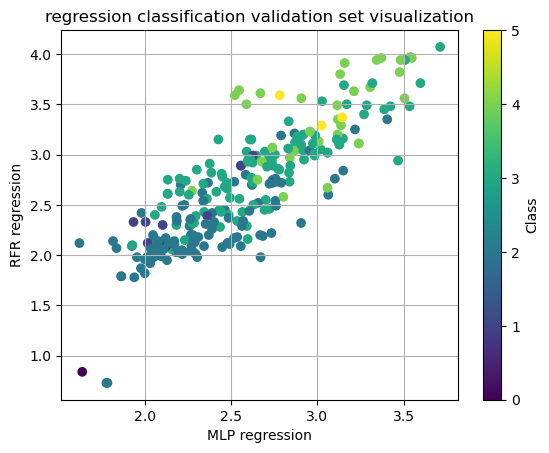

In [155]:
plt.scatter(y_pred_val_raw2, y_pred_val_raw3, c=y_val, cmap='viridis')
plt.xlabel('MLP regression')
plt.ylabel('RFR regression')
plt.title('regression classification validation set visualization')
plt.colorbar(label="Class")
plt.grid()
plt.show()

In [156]:
new = np.stack((y_pred_val_raw1, y_pred_val_raw2, y_pred_val_raw3), axis=1)
test_raw1 = knn.predict(X_test)
test_raw2 = mlp.predict(X_test)
test_raw3 = rfr.predict(X_test)
test_raw4 = svr.predict(X_test)
k = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
best_acc = 0.0
best_k = 1
best_metric = 'cityblock'
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']
for metric in metrics:
    for j in k:
        meta_knn = KNeighborsRegressor(n_neighbors=j, metric=metric, weights='distance', algorithm='brute')
        meta_knn.fit(new, y_val)
        test = np.stack((test_raw1, test_raw2, test_raw3), axis=1)
        y_pred = meta_knn.predict(test)
        y_pred = np.around(y_pred)
        accuracy_test = accuracy_score(y_test, y_pred)
        if accuracy_test > best_acc:
            best_acc = accuracy_test
            best_k = j
            best_metric = metric
print(f'test acc = {best_acc*100}%')
print(f'k = {best_k}')
print(f'metric = {best_metric}')


test acc = 71.875%
k = 24
metric = cityblock
